In [4]:
from collections import defaultdict
from gridworld import GridWorld

In [5]:
def eval_onestep(pi, V, env, gamma=0.9):
    for state in env.states():  # 각 상태에 접근
        if state == env.goal_state:  # ❷ 목표 상태에서의 가치 함수는 항상 0
            V[state] = 0
            continue

        action_probs = pi[state]
        new_V = 0

        # 각 행동에 접근        
        for action, action_prob in action_probs.items():
            next_state = env.next_state(state, action)
            r = env.reward(state, action, next_state)
            # 새로운 가치 함수
            new_V += action_prob * (r + gamma * V[next_state])

        V[state] = new_V
    return V

In [6]:
def policy_eval(pi, V, env, gamma, threshold=0.001):
    while True:
        old_V = V.copy()  # 갱신 전 가치 함수
        V = eval_onestep(pi, V, env, gamma)

        # 갱신된 양의 최댓값 계산
        delta = 0
        for state in V.keys():
            t = abs(V[state] - old_V[state])
            if delta < t:
                delta = t

        # 임계값과 비교
        if delta < threshold:
            break
    return V

In [7]:
env = GridWorld()

In [8]:
gamma = 0.9  # 할인율

In [9]:
pi = defaultdict(lambda: {0: 0.25, 1: 0.25, 2: 0.25, 3: 0.25})  # 정책
V = defaultdict(lambda: 0)  # 가치 함수

In [10]:
V = policy_eval(pi, V, env, gamma)  # 정책 평가

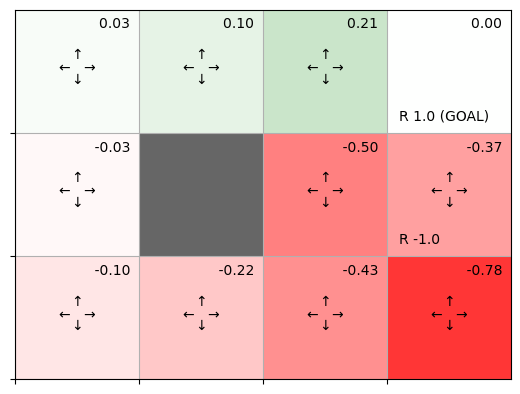

In [11]:
env.render_v(V, pi)